# Let's Get Started:

## Import Necessary Packages

First foremost, we will have to load pandas:

In [105]:
import pandas as pd

## Load the COVID-19 Dataset and Some Exploration

In [106]:
df = pd.read_csv("COVID-DATA/covid_19_data.csv")
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

## Making the Dates, actual DATEs!!!!

We have a little problem. Let's take a look at one of the Dates

In [107]:
df.ObservationDate[1]

'01/22/2020'

We can see that it is a string and not a proper date! We need to fix this to be able to do time series analysis. We can use the strptime() functionality of the datetime package to convert strings into datetime objects:

In [108]:
from pandas import datetime

In [109]:
def parser(x):
    return datetime.strptime(x, '%m/%d/%Y')

df = pd.read_csv("COVID-DATA/covid_19_data.csv", parse_dates=[1], date_parser=parser)
df.head()
    

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      2020-01-22          Anhui  Mainland China  1/22/2020 17:00   
1    2      2020-01-22        Beijing  Mainland China  1/22/2020 17:00   
2    3      2020-01-22      Chongqing  Mainland China  1/22/2020 17:00   
3    4      2020-01-22         Fujian  Mainland China  1/22/2020 17:00   
4    5      2020-01-22          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

Let's see if we have real dates now:

In [110]:
df.ObservationDate[1]

Timestamp('2020-01-22 00:00:00')

Now, let's make the **ObservationDate** as the index of the data frame, so that we could do time series analysis

In [111]:
df = pd.read_csv("COVID-DATA/covid_19_data.csv", index_col=1, parse_dates=[1], date_parser=parser)
df.head()

SNo Province/State  Country/Region      Last Update  \
ObservationDate                                                        
2020-01-22         1          Anhui  Mainland China  1/22/2020 17:00   
2020-01-22         2        Beijing  Mainland China  1/22/2020 17:00   
2020-01-22         3      Chongqing  Mainland China  1/22/2020 17:00   
2020-01-22         4         Fujian  Mainland China  1/22/2020 17:00   
2020-01-22         5          Gansu  Mainland China  1/22/2020 17:00   

                 Confirmed  Deaths  Recovered  
ObservationDate                                
2020-01-22             1.0     0.0        0.0  
2020-01-22            14.0     0.0        0.0  
2020-01-22             6.0     0.0        0.0  
2020-01-22             1.0     0.0        0.0  
2020-01-22             0.0     0.0        0.0

## Handling Missing Values

In [112]:
# Handling missing values
print(df.shape)
df.isnull().sum()

(11930, 7)


SNo                  0
Province/State    5663
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

We will drop the "Province/State" attribute as almost half of the entries have missing values for it.

In [113]:
# As Province/State has many missing values, let's drop it (ASSIGN to df AGAIN!!!)
df = df.drop(["Province/State"], axis=1)

Let's confirm that the attribute is gone and we don't have any other missing values.

In [114]:
# Confirm that there is no more NaN values
df.isnull().sum()

SNo               0
Country/Region    0
Last Update       0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

## Extracting Some Statistics

In order to get meaningful and concise statistics report from the dataset, we can use buil-in functionalities of pandas and of course visualisations.

In [117]:
#Maximum Confirmed
maximum_confirmed = df[df.Confirmed == df.Confirmed.max()]
print(maximum_confirmed[['Country/Region','Confirmed']])
print('\n')

#Maximum Deaths
maximum_deaths = df[df.Deaths == df.Deaths.max()]
print(maximum_deaths[['Country/Region','Deaths']])
print('\n')

#Maximum Recovered
maximum_recovered = df[df.Recovered == df.Recovered.max()]
print(maximum_recovered[['Country/Region','Recovered']])


                Country/Region  Confirmed
ObservationDate                          
2020-04-04               Spain   126168.0


                Country/Region   Deaths
ObservationDate                        
2020-04-04               Italy  15362.0


                 Country/Region  Recovered
ObservationDate                           
2020-04-04       Mainland China    63762.0


## Visualizing COVID19 dataset for the World!

In [118]:
import matplotlib.pyplot as plt

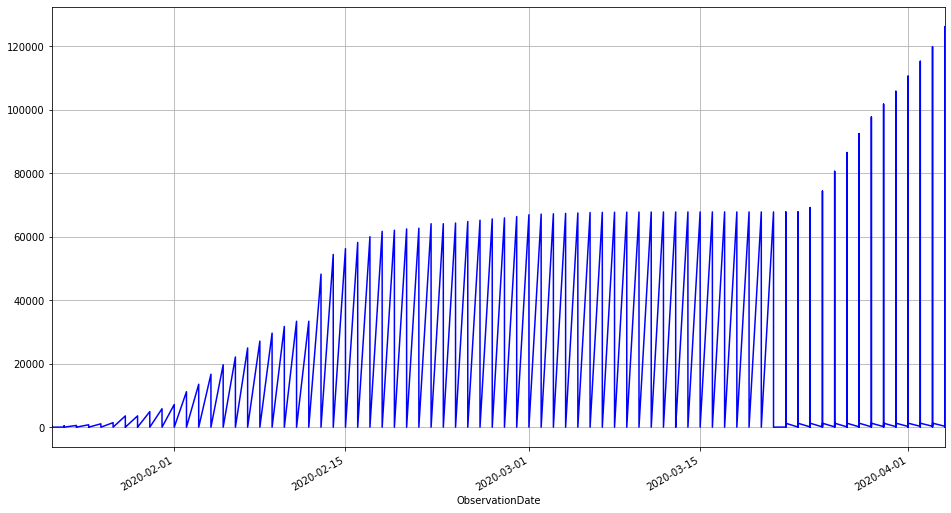

In [119]:
fig=plt.figure(figsize=(16, 9))
confirmed = df['Confirmed']
confirmed.plot(color='b')
plt.grid()

Now let's see the Deaths and Recovered visualizations as well:

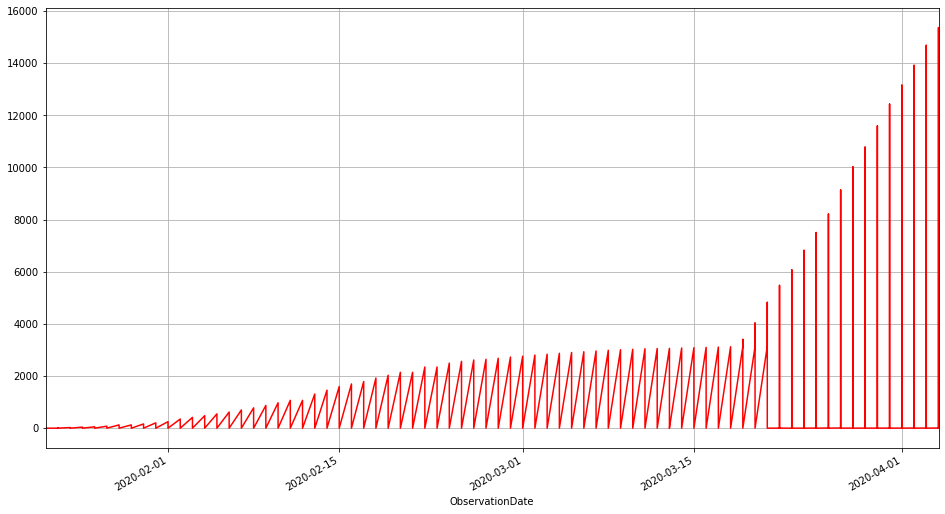

In [120]:
fig=plt.figure(figsize=(16, 9))
deaths = df['Deaths']
deaths.plot(color='r')
plt.grid()

Now let's visualize all **Confirmed**, **Deaths**, **Recovered** statistics. One way we could do it is to use matplotlib directly and generate subplots:

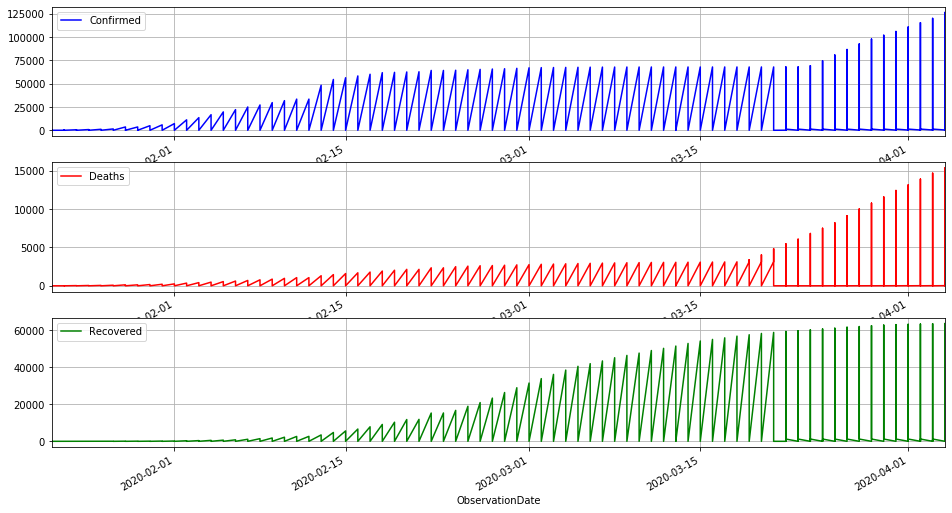

In [121]:
# Grab each column
Confirmed = df['Confirmed']
Deaths = df['Deaths']
Recovered = df['Recovered']

fig=plt.figure(figsize=(16, 9))
plt.subplot(3, 1, 1)
Confirmed.plot(color='b', label='Confirmed')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
Deaths.plot(color='r', label='Deaths')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
Recovered.plot(color='g', label='Recovered')
plt.grid()
plt.legend()

We can see that we need too much code for this! Plus, we need to control the limits of the y-axis so that we could have a good sense of comparison between the 3 figures. Luckily, pandas really comes to save the day here:

In [38]:
df.head()

SNo  Country/Region      Last Update  Confirmed  Deaths  \
ObservationDate                                                            
2020-01-22         1  Mainland China  1/22/2020 17:00        1.0     0.0   
2020-01-22         2  Mainland China  1/22/2020 17:00       14.0     0.0   
2020-01-22         3  Mainland China  1/22/2020 17:00        6.0     0.0   
2020-01-22         4  Mainland China  1/22/2020 17:00        1.0     0.0   
2020-01-22         5  Mainland China  1/22/2020 17:00        0.0     0.0   

                 Recovered  
ObservationDate             
2020-01-22             0.0  
2020-01-22             0.0  
2020-01-22             0.0  
2020-01-22             0.0  
2020-01-22             0.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA356C1C88>,
      dtype=object)

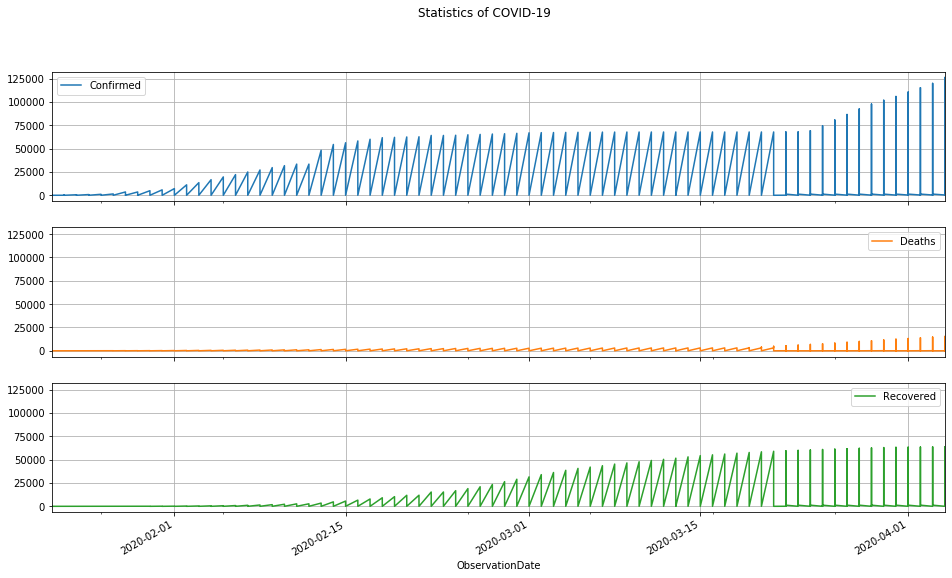

In [122]:
df.plot(subplots=True,figsize=(16, 9), sharey=True,title="Statistics of COVID-19", y=[3,4,5], grid=True)

## Visualizing COVID19 dataset for a Country/Region!

Now let's see how we can visualize for a given country. Let's check out the names of the countries in the dataset:


In [123]:
country_names = df['Country/Region'].unique()
print(country_names)

['Mainland China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia'
 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy'
 'Hungary' 'Faroe Islands' 'Gibraltar' 'Liechtenstein' 'Poland' 'Tunisia

Now we will write a function that will filter the data frame based on the name of the country that the user will define.

In [124]:
def filter_COVID(df, country):
    df= df[df['Country/Region'] == country]
    return df

We will also write a function whose job is to visualise the statistics for a given Country/Region:

In [125]:
def visualise_COVID(df, country):
    # Get the unique names of the Country/Region
    country_names = df['Country/Region'].unique()
    # Make sure that the country exists in the dataset already
    if country in country_names:
        #Filter the entire dataset and only keep the records for the arguement country
        df_filtered = filter_COVID(df, country)
        fig=plt.figure(figsize=(16, 9))
        df_filtered.plot(subplots=True,figsize=(10, 9), sharey=True,title="Statistics of COVID-19", y=[3,4,5], grid=True)
    else:
        print("Please choose a country/region from the list below:"+'\n')
        print(country_names)


Let us try a country and see some visualisations:

<Figure size 1152x648 with 0 Axes>

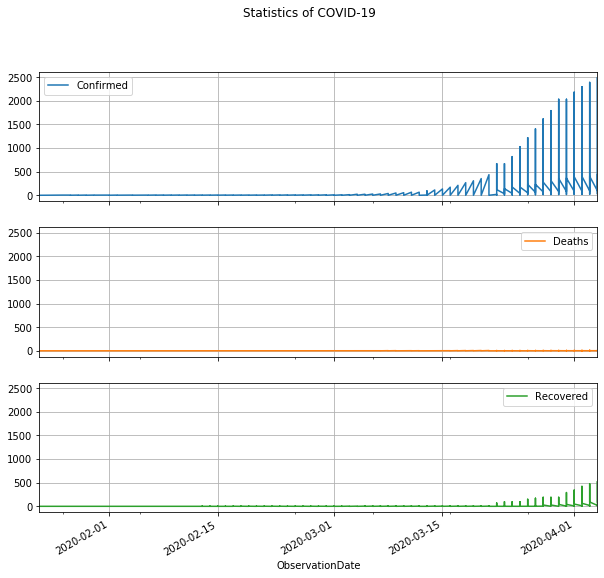

In [128]:
visualise_COVID(df, 'Australia')

Let's consider the confirmed cases. Would you say that it is a stationary process? Well no! You can see that there is a trend there! For a stationary time series the mean, and variance need to remain constant. **IMPORTANT: ARIMA does not require us to pre-process the time series into a stationary process as it will do it itself**. However, for the sake of the argument, if you are using ARMA, AR or MA models, or similar, you might want to know how to turn a non-stationary time series into a stationary time series. The reason is, these methods assume that the time series is already stationary.

## ARIMA and Timeseries


**Auto-Regressive Integrated Moving Average (ARIMA)**, is a mixture of AR and MA models, plus the ability of integration (which is used to make the input data stationary). There are 3 parameters that it needs: 
- **p**: the lags for the auto-regressive component (past values of the series itself)
- **d**: shows the order of integration (number of integrations needed to make the time series stationary)
- **q**: the moving average components (past values of the errors in the predictions)

## Forecasting with ARIMA:

In [129]:
from statsmodels.tsa.arima_model import ARIMA

In [130]:
# We will prepare the train and test data for the confirmed cases of a country
df_filtered = filter_COVID(df, 'Australia')
df_filtered = df_filtered['Confirmed']
df_filtered = df_filtered.values
size = int(len(df_filtered) * 0.80)
train, test = df_filtered[0:size], df_filtered[size:len(df_filtered)]

Now we can define an ARIMA model, with a given set of (p,d,q) and train it on the train set.

In [131]:
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
# Let us pring the aic value
print(model_fit.aic)

4034.3327839910935


Now we can make predictions:

In [132]:
predictions = model_fit.forecast(steps=test.size)[0]

Now we can plot the predictions and the ground truth:

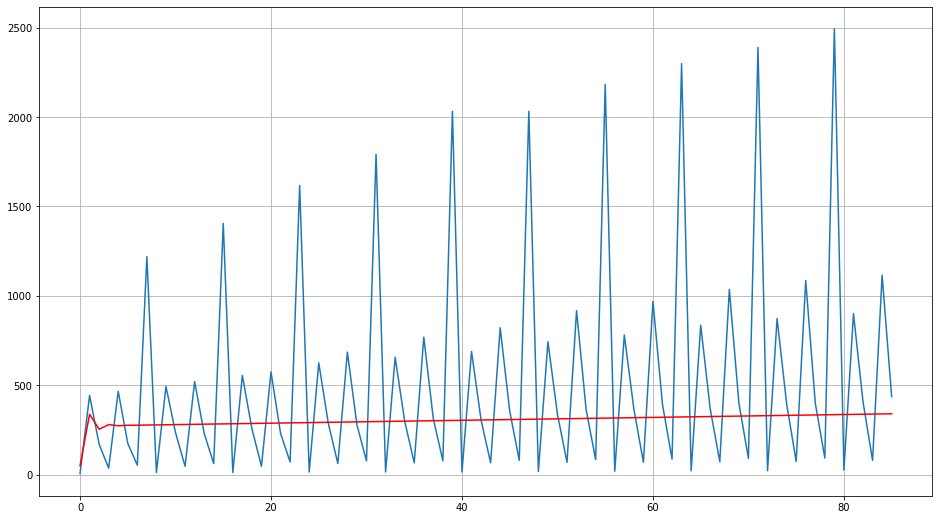

In [133]:
fig=plt.figure(figsize=(16, 9))
plt.plot(test)
plt.plot(predictions, color='red')
plt.grid()

So this is simply terrible! The performance highly depends on the values that we choose for (p,d,q). How can we find good values for these hyper-parameters?

### Finding the best combination of (p,d,q)

You can of course play with the values of (p,d,q). For example if you use (5,1,0) and (5,1,1) you will get a better result than (1,1,1). However, we need a proper search method of the grid of these 3 hyper-parameters.

In [134]:
import itertools as it
p=d=q=range(0,6)
pdq = list(it.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 5, 0),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 5),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2,

Not every combinarion of (p,d,q) makes sense and some of them will result in errors. Because of that we will use a block of try/except in the code below. Moreover, for every combination of these parameters, we will create a model and train it and record the AIC value of the model. Finally we will report the best combination of these hyper-parameters as well as the corresponding minimum AIC value.

In [135]:
import warnings
warnings.filterwarnings('ignore')
minimum_aic = 100000000
best_param = None
for param in pdq:
    try:
        model = ARIMA(train, order=param)
        model_fit = model.fit()
        current_aic = model_fit.aic
        if current_aic < minimum_aic:
            minimum_aic = current_aic
            best_param = param
        print(param)
        print("Current aic:", model_fit.aic)
    except:
        continue
print("Best parameters are %s with the aic value of %.2f" % (str(best_param), minimum_aic))

(0, 0, 0)
Current aic: 4170.430765167508
(0, 0, 1)
Current aic: 4167.47786305994
(0, 0, 2)
Current aic: 4115.612524091196
(0, 0, 3)
Current aic: 4087.4444036824907
(0, 0, 4)
Current aic: 4087.2444717772805
(0, 0, 5)
Current aic: nan
(0, 1, 0)
Current aic: 4291.449234991836
(0, 1, 1)
Current aic: 4053.8427616295876
(0, 1, 3)
Current aic: 4028.6783112184835
(0, 1, 4)
Current aic: 3956.3018396719394
(0, 2, 0)
Current aic: 4643.178043657391
(0, 2, 1)
Current aic: 4287.228336037395
(1, 0, 0)
Current aic: 4163.807479010582
(1, 0, 2)
Current aic: 4089.020051460411
(1, 0, 3)
Current aic: 4085.8960456387886
(1, 0, 4)
Current aic: 3973.3410863284
(1, 0, 5)
Current aic: 3981.964034412935
(1, 1, 0)
Current aic: 4146.303949195159
(1, 1, 1)
Current aic: 4034.3327839910935
(1, 1, 2)
Current aic: 4036.3309711082975
(1, 1, 3)
Current aic: 4040.3026406228937
(1, 1, 5)
Current aic: 3947.126223382093
(1, 2, 0)
Current aic: 4417.336170255878
(1, 2, 1)
Current aic: 4143.274451209684
(1, 2, 5)
Current aic: 4

So let's use the best parameters and see how it goes, and if it improves the performance

In [101]:
model = ARIMA(train, order=(5,1,5))
model_fit = model.fit()
# Let us pring the aic value
print(model_fit.aic)

3867.0089092138924


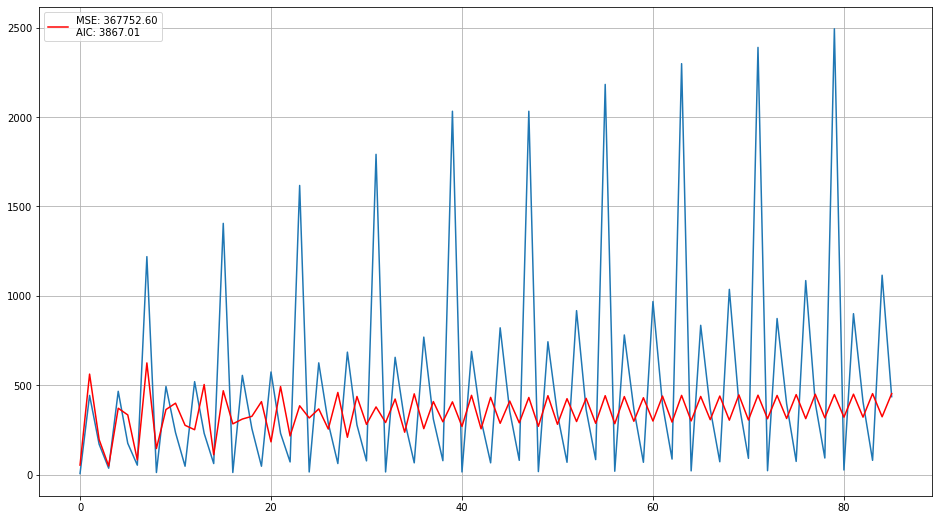

In [102]:
from sklearn.metrics import mean_squared_error as mse
predictions = model_fit.forecast(steps=test.size)[0]
error = mse(test,predictions)
fig=plt.figure(figsize=(16, 9))
plt.plot(test)
plt.plot(predictions, color='red', label="MSE: %.2f" % error+'\n'+"AIC: %.2f" % model_fit.aic)
plt.legend()
plt.grid()

We can see that the lowest AIC does NOT mean the BEST generalisation! So, let's use (5,1,4) which has a higher AIC! Can you see how the MSE changes? 

3888.3475708936307


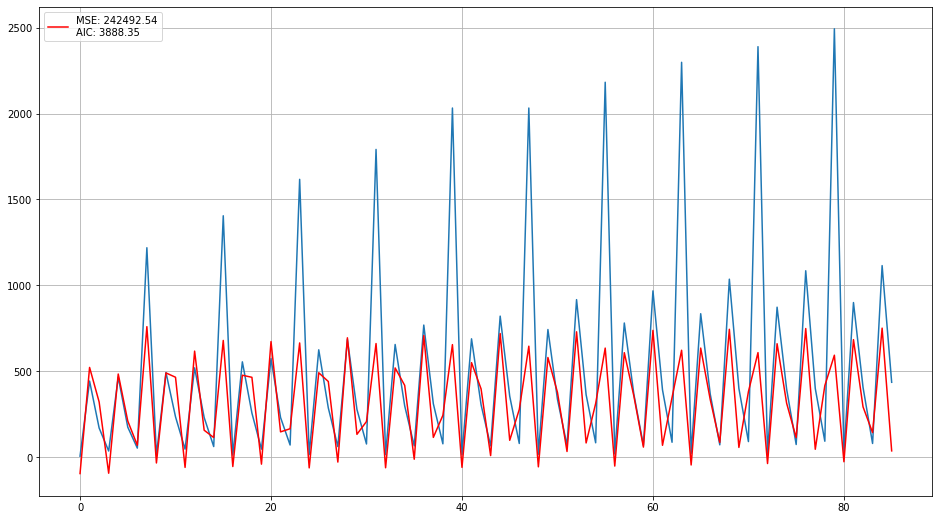

In [104]:
model = ARIMA(train, order=(5,1,4))
model_fit = model.fit()
# Let us pring the aic value
print(model_fit.aic)

from sklearn.metrics import mean_squared_error as mse
predictions = model_fit.forecast(steps=test.size)[0]
error = mse(test,predictions)
fig=plt.figure(figsize=(16, 9))
plt.plot(test)
plt.plot(predictions, color='red', label="MSE: %.2f" % error+'\n'+"AIC: %.2f" % model_fit.aic)
plt.legend()
plt.grid()

## Conclusions

ARIMA seems to be a reasonable model for time series forcasting. However, we have learned that the lowest AIC value, by no means, corresponds to the lowest MSE error value for the test set!!! Models with slightly higher AIC value can indeed make better generalisations and produce a lower MSE error during testing!